# Time Series Forecasting for Portfolio Management Optimization

In today’s highly dynamic financial markets, precise forecasting and portfolio management have become essential for investment success. As financial analysts, we strive to utilize innovative techniques to enhance our predictions and guide investment strategies. Guide Me in Finance (GMF) Investments, our firm, specializes in data-driven, personalized financial advisory services. By implementing advanced time series forecasting, our goal is to provide clients with actionable insights that help optimize returns and minimize risks, aligning with their unique financial goals.
GMF Investments harnesses real-time financial data from reliable sources, including YFinance, to remain responsive to shifting market conditions. This enables us to recommend timely portfolio adjustments that can capitalize on emerging opportunities or mitigate potential downturns. As we focus on integrating modern forecasting techniques, we aim to improve our decision-making accuracy in a competitive market landscape.

# Business Need
As financial analysts, one of our primary responsibilities at GMF is to analyze historical financial data to build predictive models that forecast future asset prices. Accurate forecasting allows us to adjust portfolio allocations proactively, optimizing returns and managing risks according to each client’s investment horizon, risk tolerance, and financial objectives. Given the complexity of market data, there is a critical need to refine our approach with more sophisticated models capable of capturing trends and patterns in asset prices over time.
The volatility and unpredictability of financial assets like Tesla (TSLA) stock, Vanguard Total Bond Market ETF (BND), and the S&P 500 ETF (SPY) present both risks and opportunities. Each asset’s unique characteristics demand specialized handling in our forecasting efforts. For instance, TSLA’s high volatility requires more advanced models, while BND’s stability makes it suitable for more conservative forecasting approaches. By utilizing a structured approach to time series analysis and model selection, we aim to gain insights that will enable GMF to deliver exceptional service to clients seeking to optimize their portfolios.

# Objective
The objective of this challenge is to equip trainees with the skills to preprocess financial data, develop time series forecasting models, analyze market trends, and optimize investment portfolios. Participants will gain hands-on experience in leveraging data-driven insights to enhance portfolio performance, minimize risks, and capitalize on market opportunities. Our primary objectives in this research are as follows:
1.	To preprocess, analyze, and understand historical data for key assets, specifically TSLA, BND, and SPY, using YFinance.
2.	To develop and evaluate time series forecasting models that predict future asset prices and market trends, with a focus on ARIMA, SARIMA, and LSTM methodologies.
3.	To utilize these forecasts in making data-driven portfolio adjustments, enhancing risk management, and maximizing returns for GMF’s clients.
4.	To analyze the risk-return profile of the portfolio using performance metrics such as the Sharpe Ratio and Value at Risk (VaR).



# Data Collection

We Use historical financial data for three key assets: Tesla (TSLA) Historical stock prices (Open, High, Low, Close), volume, and volatility., Vanguard Total Bond Market ETF (BND), and S&P 500 ETF (SPY). The data will be sourced from YFinance and cover the period from January 1, 2015, to December 31, 2024.

### Import Necessary Library

In [1]:
#!pip install yfinance pmdarima

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima

from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from prophet import Prophet

# For reproducibility
import tensorflow as tf
tf.random.set_seed(42)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')


## Data Loading and Preprocessing

In [3]:
import yfinance as yf

# Define tickers and date range
tickers = ['TSLA', 'SPY', 'BND']
start_date = '2015-01-01'
end_date = '2024-10-31'

# Download data for each ticker
tsla_data = yf.download(tickers[0], start=start_date, end=end_date)
spy_data = yf.download(tickers[1], start=start_date, end=end_date)
bnd_data = yf.download(tickers[2], start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Inspect data
tsla_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


In [5]:
spy_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,SPY,SPY,SPY,SPY,SPY,SPY
Date,,,,,,
2015-01-02 00:00:00+00:00,173.173737,205.429993,206.880005,204.179993,206.380005,121465900
2015-01-05 00:00:00+00:00,170.046341,201.720001,204.369995,201.350006,204.169998,169632600
2015-01-06 00:00:00+00:00,168.444626,199.820007,202.720001,198.860001,202.089996,209151400
2015-01-07 00:00:00+00:00,170.543625,202.309998,202.720001,200.880005,201.419998,125346700
2015-01-08 00:00:00+00:00,173.569977,205.899994,206.160004,203.990005,204.009995,147217800


In [6]:
bnd_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,BND,BND,BND,BND,BND,BND
Date,,,,,,
2015-01-02 00:00:00+00:00,63.358772,82.650002,82.690002,82.419998,82.430000,2218800
2015-01-05 00:00:00+00:00,63.542763,82.889999,82.919998,82.699997,82.739998,5820100
2015-01-06 00:00:00+00:00,63.726727,83.129997,83.379997,83.029999,83.029999,3887600
2015-01-07 00:00:00+00:00,63.765038,83.180000,83.279999,83.050003,83.139999,2433400
2015-01-08 00:00:00+00:00,63.665386,83.050003,83.110001,82.970001,83.110001,1873400


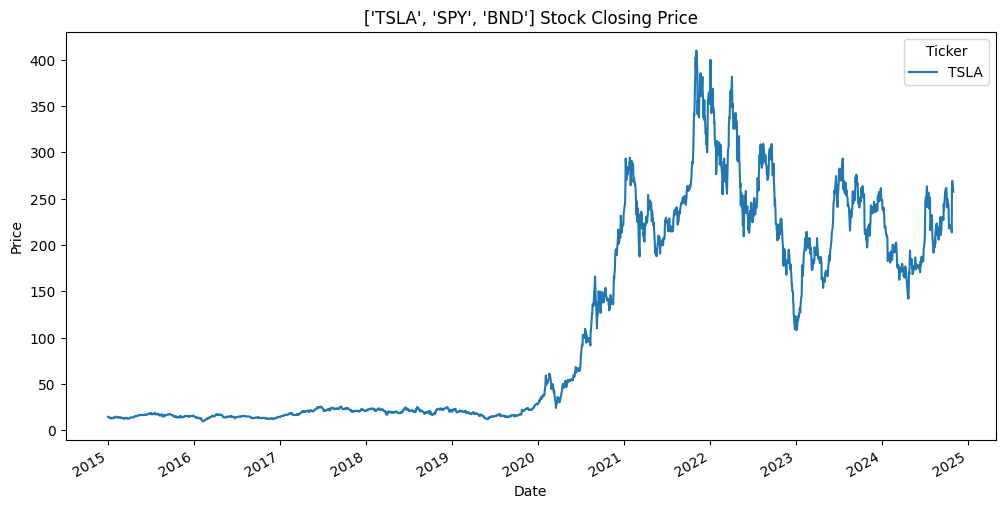

In [7]:
# Stock Closing Price
tsla_data['Adj Close'].plot(figsize=(12, 6), title=f"{tickers} Stock Closing Price", xlabel='Date', ylabel='Price')
plt.show()


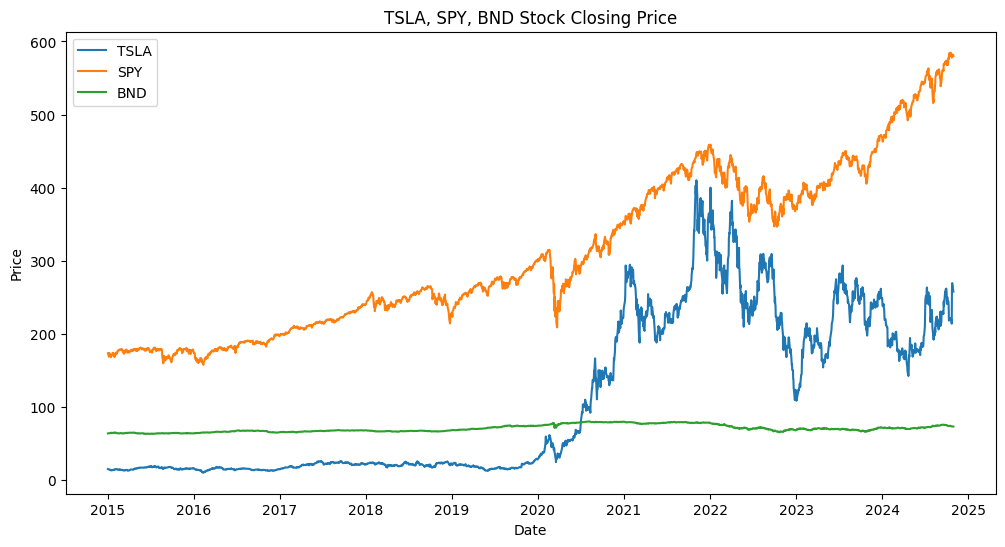

In [8]:
# Plot Adjusted Close prices for each ticker
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Adj Close'], label='TSLA')
plt.plot(spy_data['Adj Close'], label='SPY')
plt.plot(bnd_data['Adj Close'], label='BND')

# Add title and labels
plt.title(f"{', '.join(tickers)} Stock Closing Price")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()  # Show legend
plt.show()


## Data Cleaning and Preparation

In [9]:
# Check for missing values and fill them for each dataset
for data, ticker in zip([tsla_data, spy_data, bnd_data], tickers):
    print(f"Missing values in {ticker}:")
    print(data.isnull().sum())

    # Fill missing values (if any)
    data.fillna(method='ffill', inplace=True)
    data.fillna(method='bfill', inplace=True)  # Optionally fill backward if leading NaNs exist

# Extract 'Adj Close' prices for each ticker after filling missing values
tsla_close = tsla_data['Adj Close']
spy_close = spy_data['Adj Close']
bnd_close = bnd_data['Adj Close']

# (Optional) Scale or normalize if needed, e.g., using min-max scaling or z-score normalization
# Example: min-max scaling
tsla_close_scaled = (tsla_close - tsla_close.min()) / (tsla_close.max() - tsla_close.min())
spy_close_scaled = (spy_close - spy_close.min()) / (spy_close.max() - spy_close.min())
bnd_close_scaled = (bnd_close - bnd_close.min()) / (bnd_close.max() - bnd_close.min())

print("Data preparation complete.")

Missing values in TSLA:
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64
Missing values in SPY:
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64
Missing values in BND:
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64
Data preparation complete.


## Seasonal decomposition

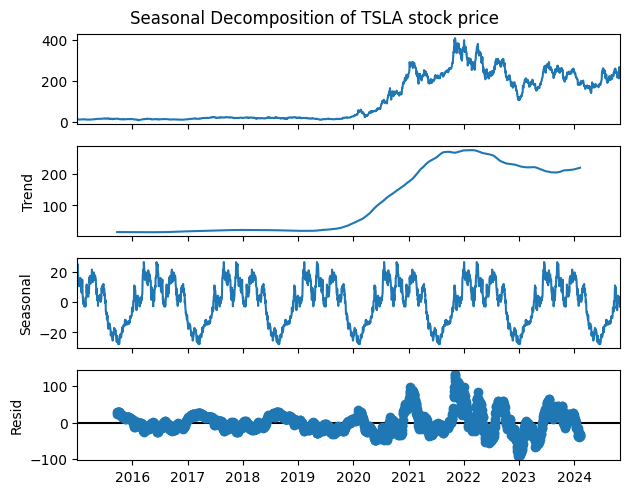

In [10]:
# Seasonal decomposition for TSLA Adjusted Close price
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsla_data['Adj Close'], model='additive', period=365)
decomposition.plot()
plt.suptitle("Seasonal Decomposition of TSLA stock price", y=1.02)  # Adjust title position
plt.show()

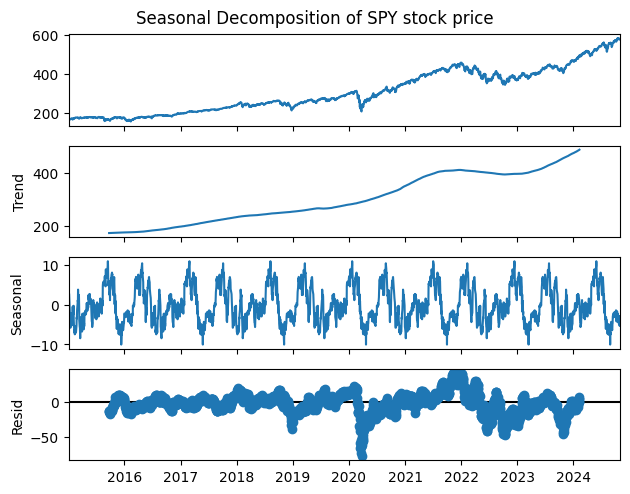

In [11]:
# Seasonal decomposition for SPY Adjusted Close price
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(spy_data['Adj Close'], model='additive', period=365)
decomposition.plot()
plt.suptitle("Seasonal Decomposition of SPY stock price", y=1.02)  # Adjust title position
plt.show()

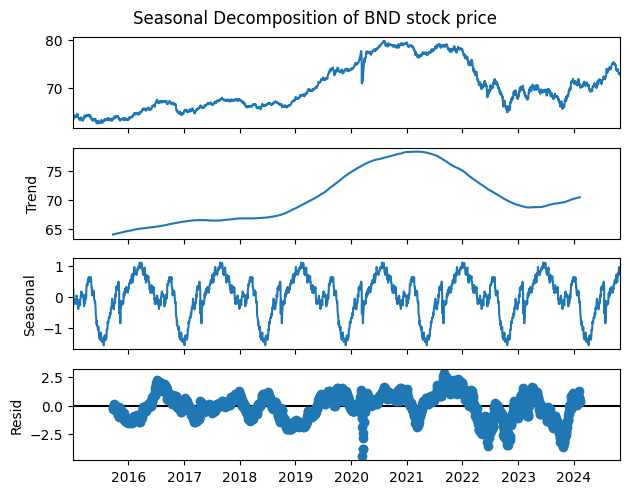

In [12]:
# Seasonal decomposition for BND Adjusted Close price
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(bnd_data['Adj Close'], model='additive', period=365)
decomposition.plot()
plt.suptitle("Seasonal Decomposition of BND stock price", y=1.02)  # Adjust title position
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller

# ADF test for stationarity for each ticker
def adf_test(data, ticker):
    print(f"ADF Test for {ticker}:")
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("")

# Perform ADF test for stationarity on each adjusted close data
adf_test(tsla_data['Adj Close'], 'TSLA')
adf_test(spy_data['Adj Close'], 'SPY')
adf_test(bnd_data['Adj Close'], 'BND')

ADF Test for TSLA:
ADF Statistic: -1.1507672706146033
p-value: 0.6944080657685308

ADF Test for SPY:
ADF Statistic: 1.0133127008301694
p-value: 0.9944044458219257

ADF Test for BND:
ADF Statistic: -1.4746545305194898
p-value: 0.5460100577513647



In [14]:
# # Check if initial p-value is greater than 0.05
# if result[1] > 0.05:
#     # Apply differencing to make the series stationary
#     tsla_data = tsla_data.diff().dropna()
    
#     # Run the ADF test again
#     result = adfuller(tsla_data)
    
# # Interpret stationarity
# stationarity_interpretation = "Stationary" if result[1] < 0.05 else "Non-Stationary"

# # Print results
# print(f"ADF Statistic after differencing: {result[0]}")
# print(f"p-value after differencing: {result[1]}")
# print(f"Interpretation: The series is {stationarity_interpretation}.")

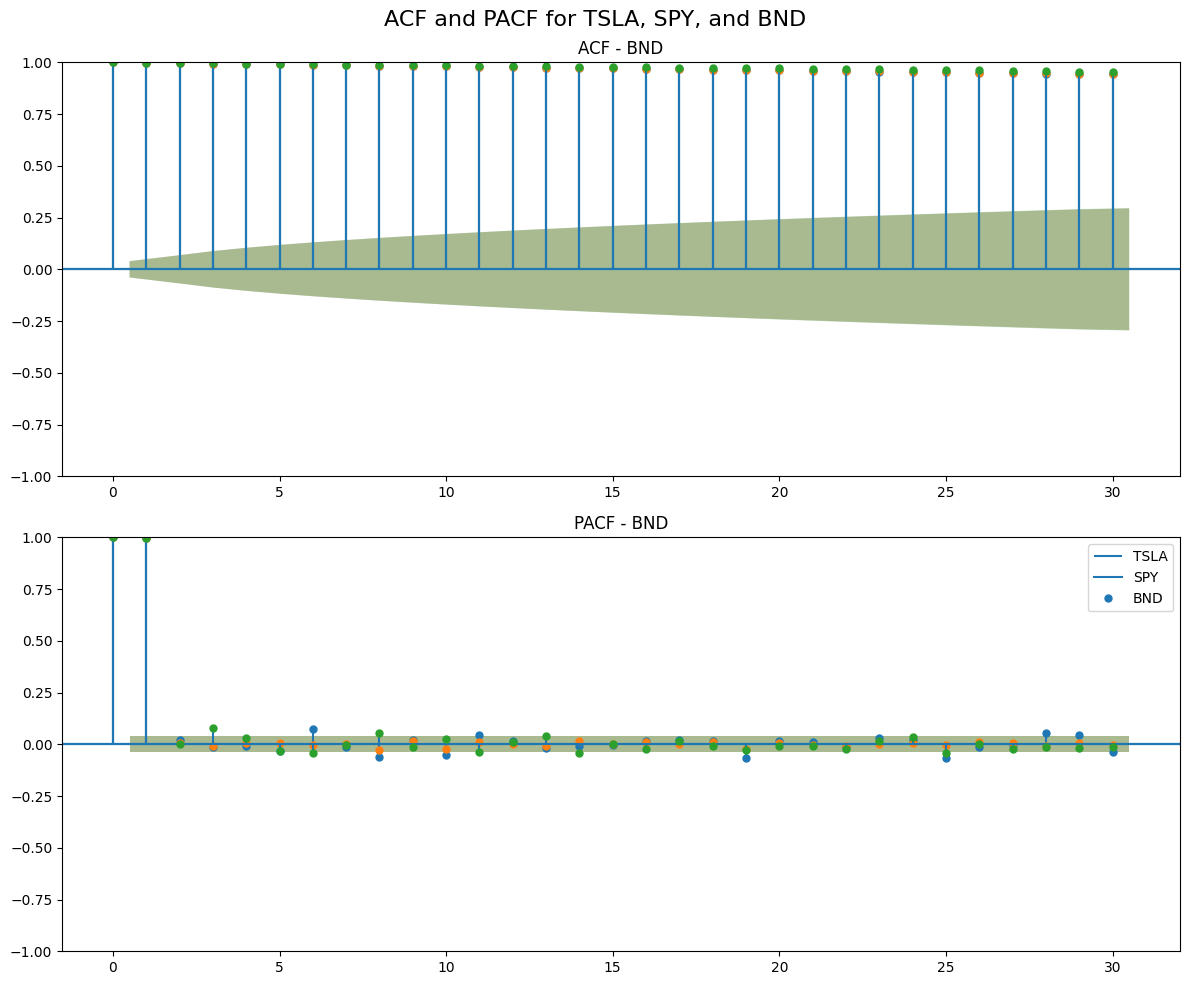

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Create a single plot for ACF and PACF of all three tickers
fig, ax = plt.subplots(2, 1, figsize=(12, 10))

# Plot ACF for each ticker
plot_acf(tsla_data['Adj Close'], ax=ax[0], lags=30, title="ACF - TSLA")
plot_acf(spy_data['Adj Close'], ax=ax[0], lags=30, title="ACF - SPY")
plot_acf(bnd_data['Adj Close'], ax=ax[0], lags=30, title="ACF - BND")

# Plot PACF for each ticker
plot_pacf(tsla_data['Adj Close'], ax=ax[1], lags=30, title="PACF - TSLA")
plot_pacf(spy_data['Adj Close'], ax=ax[1], lags=30, title="PACF - SPY")
plot_pacf(bnd_data['Adj Close'], ax=ax[1], lags=30, title="PACF - BND")

# Add a title and show the plot
plt.suptitle('ACF and PACF for TSLA, SPY, and BND', fontsize=16)
plt.tight_layout()
plt.legend(['TSLA', 'SPY', 'BND'], loc='upper right')
plt.show()


## Train-Test Split

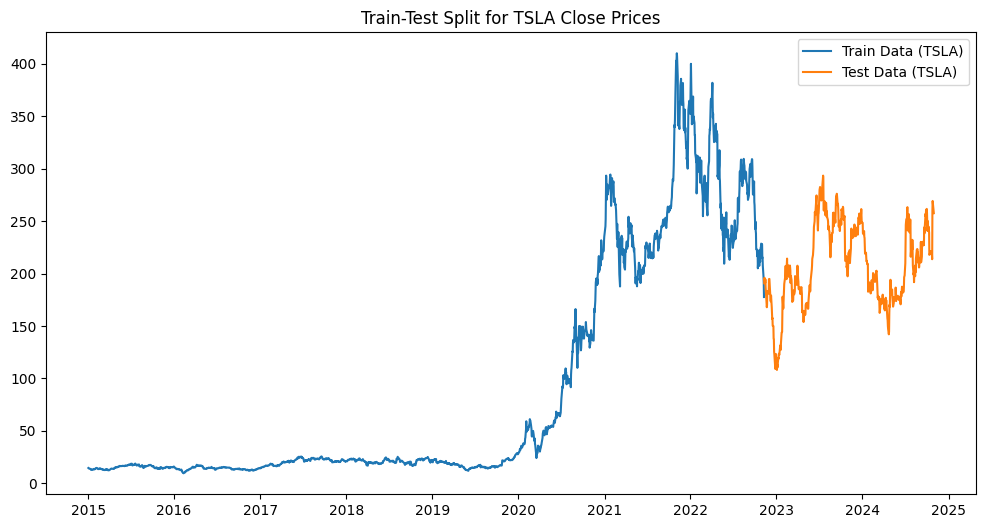

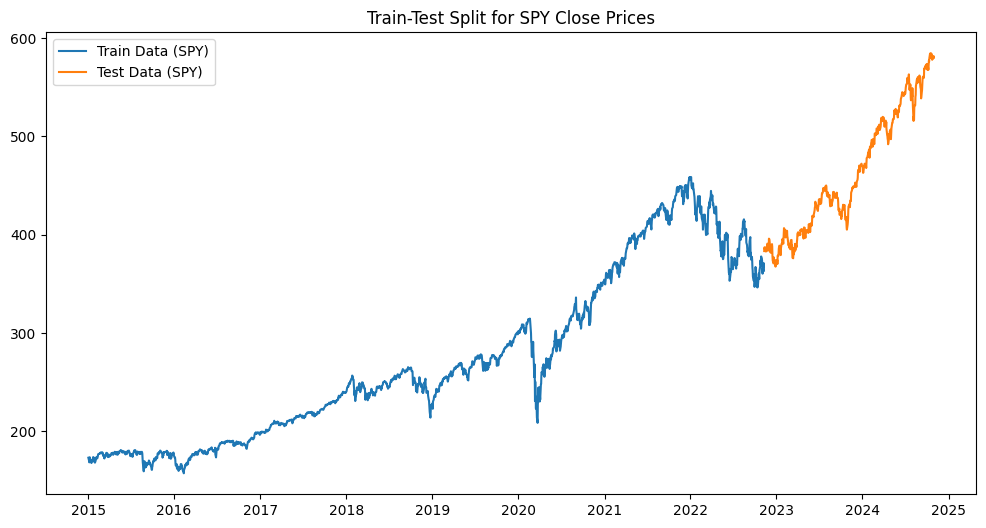

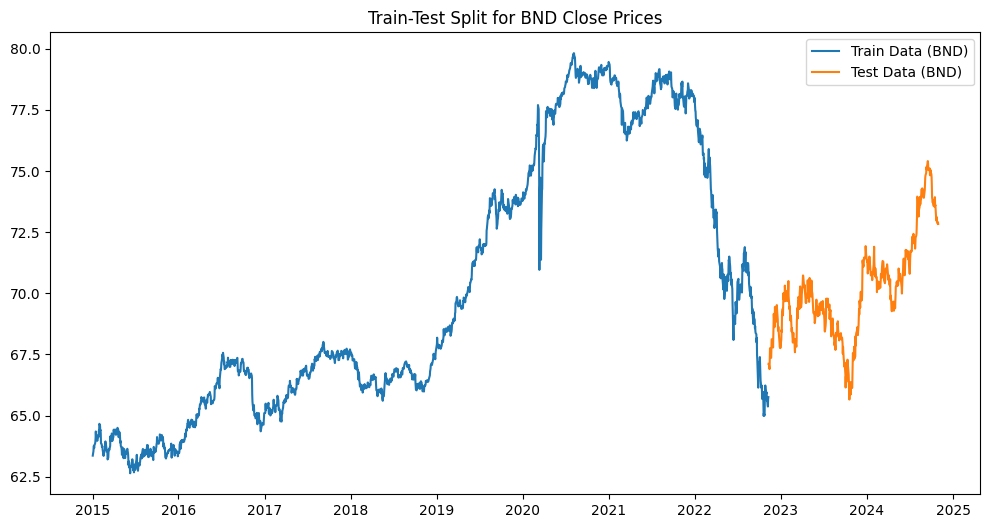

In [16]:
# Define the split ratio
split_ratio = 0.8
train_size = int(len(tsla_close) * split_ratio)

# Split the data for TSLA
tsla_train, tsla_test = tsla_close[:train_size], tsla_close[train_size:]
plt.figure(figsize=(12, 6))
plt.plot(tsla_train, label='Train Data (TSLA)')
plt.plot(tsla_test, label='Test Data (TSLA)')
plt.legend()
plt.title("Train-Test Split for TSLA Close Prices")
plt.show()

# Split the data for SPY
spy_train, spy_test = spy_close[:train_size], spy_close[train_size:]
plt.figure(figsize=(12, 6))
plt.plot(spy_train, label='Train Data (SPY)')
plt.plot(spy_test, label='Test Data (SPY)')
plt.legend()
plt.title("Train-Test Split for SPY Close Prices")
plt.show()

# Split the data for BND
bnd_train, bnd_test = bnd_close[:train_size], bnd_close[train_size:]
plt.figure(figsize=(12, 6))
plt.plot(bnd_train, label='Train Data (BND)')
plt.plot(bnd_test, label='Test Data (BND)')
plt.legend()
plt.title("Train-Test Split for BND Close Prices")
plt.show()



## Model Building and Training

### 1. ARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12345.046, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=12340.889, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12339.852, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12339.956, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=12339.337, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12341.053, Time=0.41 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.412 seconds
Optimal (p, d, q) parameters: (0, 1, 0)
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=10342.045, Time=1.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=10433.548, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=10417.356, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=10419.091, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=10433.150, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=10416.089, Time=0.

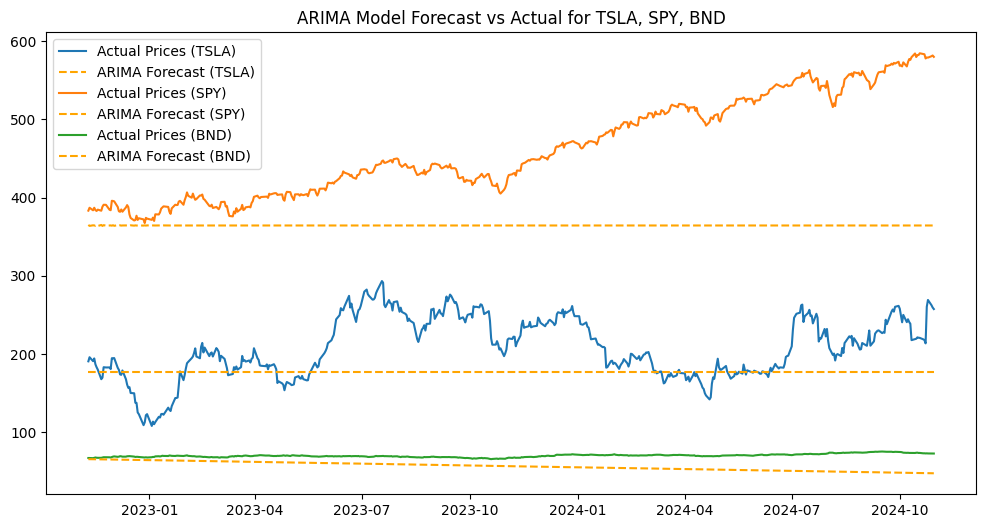

In [17]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Function to apply ARIMA model
def apply_arima(train, test):
    # Automatically find the optimal ARIMA (p, d, q) parameters
    arima_model = auto_arima(train, seasonal=False, trace=True)
    print(f"Optimal (p, d, q) parameters: {arima_model.order}")

    # Fit the ARIMA model
    model_arima = ARIMA(train, order=arima_model.order)
    model_arima_fit = model_arima.fit()

    # Forecast for the test period
    arima_forecast = model_arima_fit.forecast(steps=len(test))
    
    return arima_forecast, test

# Prepare data and apply ARIMA for each ticker
plt.figure(figsize=(12, 6))

tickers = ['TSLA', 'SPY', 'BND']
for ticker in tickers:
    # Assuming train and test data are already defined for each ticker
    arima_forecast, test = apply_arima(eval(f"{ticker.lower()}_train"), eval(f"{ticker.lower()}_test"))

    # Plot actual vs ARIMA forecast for each ticker
    plt.plot(test.index, test.values, label=f'Actual Prices ({ticker})')
    plt.plot(test.index, arima_forecast, label=f'ARIMA Forecast ({ticker})', linestyle='--', color='orange')

# Add title and legend
plt.title("ARIMA Model Forecast vs Actual for TSLA, SPY, BND")
plt.legend()
plt.show()


### 2. SARIMA Model

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=12337.622, Time=2.18 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=12340.889, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=12340.375, Time=0.42 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=12340.797, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=12339.337, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=12345.594, Time=1.54 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=12345.207, Time=1.88 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=12315.154, Time=6.21 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=12313.154, Time=4.75 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=12311.156, Time=3.31 sec
 ARIMA(1,1,2)(1,0,0)[12] intercept   : AIC=12343.201, Time=1.28 sec
 ARIMA(1,1,2)(2,0,1)[12] intercept   : AIC=12313.155, Time=5.35 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=12335.607, Time=2.43 sec
 ARIMA(0,1,2)(2,0,0)[12] intercept   : AIC=12309.410, Time=1.76 sec
 ARIM

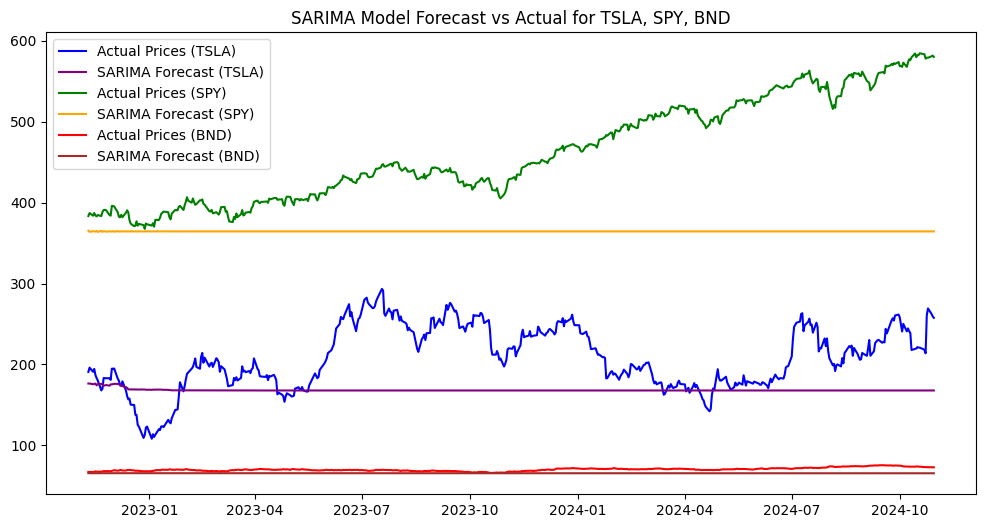

In [18]:
import pmdarima as pm
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# SARIMA modeling for TSLA, SPY, BND

# Initialize the figure
plt.figure(figsize=(12, 6))

# SARIMA model for TSLA
sarima_model_tsla = pm.auto_arima(tsla_train, seasonal=True, m=12, trace=True)
print(f"Optimal SARIMA parameters for TSLA: {sarima_model_tsla.order}x{sarima_model_tsla.seasonal_order}")
model_sarima_tsla = SARIMAX(tsla_train, order=sarima_model_tsla.order, seasonal_order=sarima_model_tsla.seasonal_order)
model_sarima_fit_tsla = model_sarima_tsla.fit(disp=False)
sarima_forecast_tsla = model_sarima_fit_tsla.forecast(steps=len(tsla_test))

# SARIMA model for SPY
sarima_model_spy = pm.auto_arima(spy_train, seasonal=True, m=12, trace=True)
print(f"Optimal SARIMA parameters for SPY: {sarima_model_spy.order}x{sarima_model_spy.seasonal_order}")
model_sarima_spy = SARIMAX(spy_train, order=sarima_model_spy.order, seasonal_order=sarima_model_spy.seasonal_order)
model_sarima_fit_spy = model_sarima_spy.fit(disp=False)
sarima_forecast_spy = model_sarima_fit_spy.forecast(steps=len(spy_test))

# SARIMA model for BND
sarima_model_bnd = pm.auto_arima(bnd_train, seasonal=True, m=12, trace=True)
print(f"Optimal SARIMA parameters for BND: {sarima_model_bnd.order}x{sarima_model_bnd.seasonal_order}")
model_sarima_bnd = SARIMAX(bnd_train, order=sarima_model_bnd.order, seasonal_order=sarima_model_bnd.seasonal_order)
model_sarima_fit_bnd = model_sarima_bnd.fit(disp=False)
sarima_forecast_bnd = model_sarima_fit_bnd.forecast(steps=len(bnd_test))

# Plotting all three forecasts
plt.plot(tsla_test, label='Actual Prices (TSLA)', color='blue')
plt.plot(tsla_test.index, sarima_forecast_tsla, label='SARIMA Forecast (TSLA)', color='purple')
plt.plot(spy_test, label='Actual Prices (SPY)', color='green')
plt.plot(spy_test.index, sarima_forecast_spy, label='SARIMA Forecast (SPY)', color='orange')
plt.plot(bnd_test, label='Actual Prices (BND)', color='red')
plt.plot(bnd_test.index, sarima_forecast_bnd, label='SARIMA Forecast (BND)', color='brown')

# Add legend and title
plt.legend()
plt.title("SARIMA Model Forecast vs Actual for TSLA, SPY, BND")
plt.show()


### 3. LSTM Model

Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0224
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0012
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0010
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0010
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 9.7105e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.0494e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.4013e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.9848e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.7617e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.6223e-04
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - loss: 0.0409
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 8.3094e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 7.1275e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.0852e-04

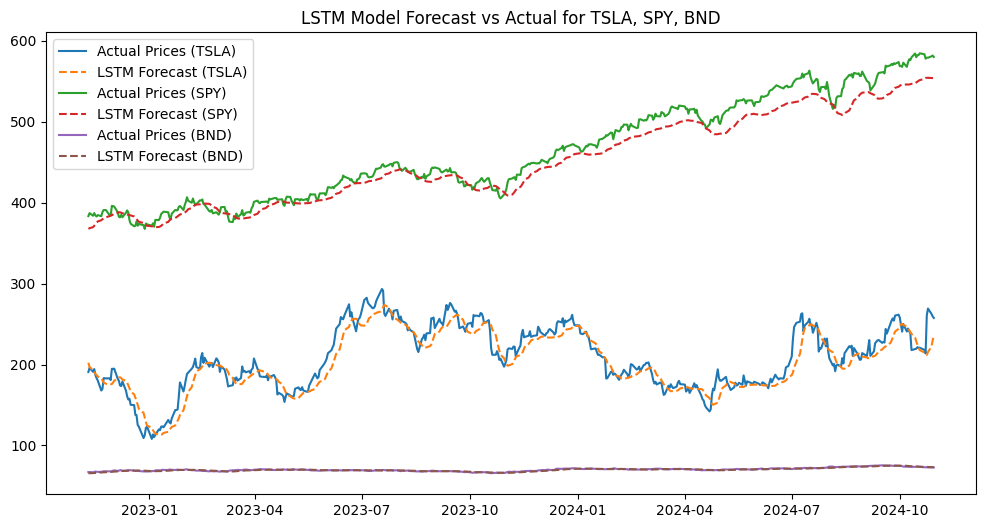

In [19]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np
import matplotlib.pyplot as plt

# Prepare and scale the data for LSTM model
def prepare_lstm_data(train, test):
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(np.array(train).reshape(-1, 1))

    # Prepare data for LSTM training
    X_train, y_train = [], []
    for i in range(60, len(train_scaled)):
        X_train.append(train_scaled[i-60:i])
        y_train.append(train_scaled[i])

    X_train, y_train = np.array(X_train), np.array(y_train)

    # Prepare test data inputs for LSTM predictions
    inputs = scaler.transform(np.array(train.iloc[-60:, 0].tolist() + test.iloc[:, 0].tolist()).reshape(-1, 1))
    X_test = [inputs[i-60:i] for i in range(60, len(inputs))]
    X_test = np.array(X_test)

    return scaler, X_train, y_train, X_test, test

# LSTM model architecture
def build_lstm_model(X_train):
    model_lstm = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50),
        Dense(1)
    ])
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')
    return model_lstm

# Train the model and make predictions
def train_and_predict_lstm(model_lstm, X_train, y_train, X_test):
    model_lstm.fit(X_train, y_train, epochs=10, batch_size=32)
    lstm_forecast = model_lstm.predict(X_test)
    return lstm_forecast

# Scale data for each ticker (TSLA, SPY, BND) and prepare for LSTM
plt.figure(figsize=(12, 6))

tickers = ['TSLA', 'SPY', 'BND']
for ticker in tickers:
    # Assuming train and test are already defined for each ticker
    scaler, X_train, y_train, X_test, test = prepare_lstm_data(eval(f"{ticker.lower()}_train"), eval(f"{ticker.lower()}_test"))
    
    # Build and train the LSTM model
    model_lstm = build_lstm_model(X_train)
    lstm_forecast = train_and_predict_lstm(model_lstm, X_train, y_train, X_test)

    # Inverse transform predictions to original scale
    lstm_forecast = scaler.inverse_transform(lstm_forecast)
    lstm_forecast = lstm_forecast[-len(test):]  # Align forecast and test data

    # Plot actual vs LSTM forecast for each ticker
    plt.plot(test.index, test.values, label=f'Actual Prices ({ticker})')
    plt.plot(test.index, lstm_forecast, label=f'LSTM Forecast ({ticker})', linestyle='--')

# Add title and legend
plt.title("LSTM Model Forecast vs Actual for TSLA, SPY, BND")
plt.legend()
plt.show()


## Model Evaluation

In [23]:
# Define function to calculate evaluation metrics
def calculate_metrics(actual, forecast):
    mae = mean_absolute_error(actual, forecast)
    rmse = mean_squared_error(actual, forecast, squared=False)
    mape = mean_absolute_percentage_error(actual, forecast)
    return mae, rmse, mape

# Evaluate models
arima_mae, arima_rmse, arima_mape = calculate_metrics(test, arima_forecast)
sarima_mae, sarima_rmse, sarima_mape = calculate_metrics(test, sarima_forecast_tsla)
lstm_mae, lstm_rmse, lstm_mape = calculate_metrics(test, lstm_forecast)

# Print metrics
print("ARIMA: MAE =", arima_mae, ", RMSE =", arima_rmse, ", MAPE =", arima_mape)
print("SARIMA: MAE =", sarima_mae, ", RMSE =", sarima_rmse, ", MAPE =", sarima_mape)
print("LSTM: MAE =", lstm_mae, ", RMSE =", lstm_rmse, ", MAPE =", lstm_mape)


ARIMA: MAE = 13.504691238496656 , RMSE = 15.136557015007918 , MAPE = 0.19037717946468774
SARIMA: MAE = 98.02162986528101 , RMSE = 98.06256510177526 , MAPE = 1.3998721611731797
LSTM: MAE = 0.5165830824110244 , RMSE = 0.6373843843768301 , MAPE = 0.007386641315976616
